In [1]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [2]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
from deprecated.Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import ChipResonatorsTline, ChipTline, ChipResonatorsTwoTlines, ChipResonatorsThreeTlines
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *

In [3]:
epsilon_r = [11.9]
thickness_subs = [525e-6]
Lk = 100e-15

Feedline

In [4]:
FeedlineWidth = 20
FeedlineLength  = 4300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r, thickness_subs, ind_kin_sq=Lk), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r, thickness_subs, ind_kin_sq=Lk, length_CPW=(FeedlineLength + FeedlineTaperLength + BondpadLength)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.361087063625966 Ohm
Frequency of the feedline is 3.0082117882781736 GHz


# SiRes-Al-0p6-v2

In [16]:
np.linspace(136,0,6)

array([136. , 108.8,  81.6,  54.4,  27.2,   0. ])

Resonator 1
Resonator 2
Resonator 3
Resonator 4
Inductor total length is [6820. 5995. 5335. 4180.]
The frequencies are [4.0879121554227655, 4.9403771008491475, 6.187956089839854, 6.984202631226809]


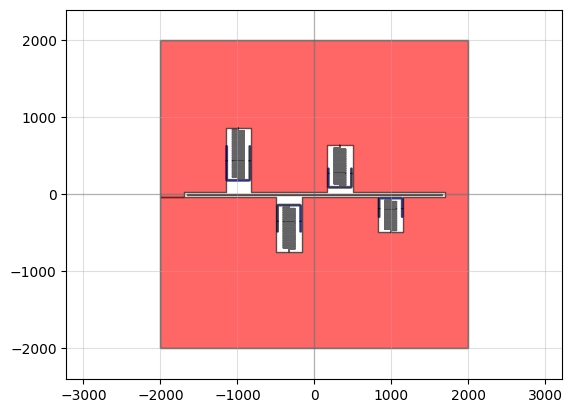

In [6]:
NumberOfResonators = int(4)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450,350, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[40,35, 31, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*np.linspace(136,0,4)
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
FeedlineWidth = 20
FeedlineLength  = 3300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
# FeedlineLength = 3300
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 4000]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)


il = round(InductorTotalLength[0])
cvl = round(CapacitorVerticalLength[0])

chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/202504-Res-Al/Res-Al-0p6-v2.gds")
qp(chip)

Resonator 1
Resonator 2
Resonator 3
Resonator 4
Resonator 5
Resonator 6
Inductor total length is [5995. 5995. 5995. 5170. 4675. 4180.]
The frequencies are [4.359977640918617, 4.940734275899147, 5.839368853080707, 6.286425654900781, 6.6085227410625516, 6.984202631226809]


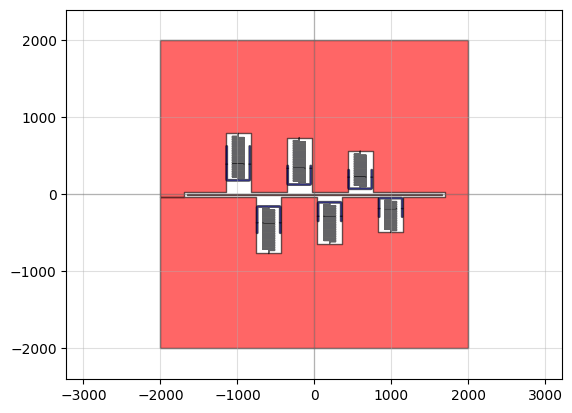

In [ ]:
# NumberOfResonators = int(6)
# SeparationTlineResonator = [0]*NumberOfResonators

# #cvl = np.linspace(200, 600, 10)
# #nob = np.linspace(15, 40, 10, dtype=int)


# #Resonator parameters
# CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
# CapacitorVerticalLength = np.ones(NumberOfResonators)*[450,350,250, 250, 250, 250]
# CapacitorWidth = np.ones(NumberOfResonators)*20 
 

# NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35,35,35, 30,27, 24]
# InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
# InductorEndLength = np.ones(NumberOfResonators)*[10] 
# InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
# InductorWidth = np.ones(NumberOfResonators)*[0.6] 
# TaperWidth = np.ones(NumberOfResonators)*20 
# InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
# SpacingC0 = np.ones(NumberOfResonators)*5 
# SpacingCc = np.ones(NumberOfResonators)*np.linspace(136,0,6)
# TaperLength = np.ones(NumberOfResonators)*5 
# FinalSpacingBondpads = 100
 
# FeedlineWidth = 20
# FeedlineLength  = 3300
# FeedlineGap= 27.5
# FeedlineTaperLength =  100
# BondpadWidth =  200
# BondpadLength= 250
# BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

# freqs = []
# for i in range(NumberOfResonators):
#     print(f'Resonator {i+1}')
#     freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
#                                             CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
#                                             InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
#                                         epsilon_r, thickness_subs)/1e9)                                        

# print('Inductor total length is', InductorTotalLength)
# print('The frequencies are', freqs)

# #feedline
# # FeedlineLength = 3300
# ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 4000]

# c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
#                         FeedlineWidth, FeedlineLength, FeedlineGap, 
#                         FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
#                         CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
#                         NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
#                         TaperWidth, TaperLength, SpacingC0, SpacingCc,
#                         FinalSpacingBondpads, MWO_simulation=True)


# il = round(InductorTotalLength[0])
# cvl = round(CapacitorVerticalLength[0])

# # chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/202504-Res-Al/Res-Al-0p6-v2.gds")
# qp(chip)

Cap sim

Resonator 1
Resonator 2
Resonator 3
Resonator 4
Inductor total length is [6820. 5995. 5335. 4180.]
The frequencies are [4.0879121554227655, 4.9403771008491475, 6.187956089839854, 6.984202631226809]


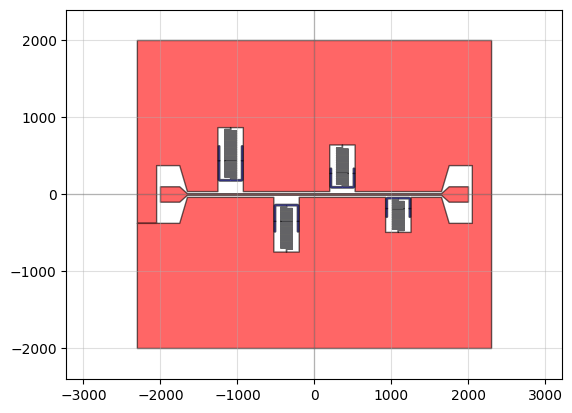

In [ ]:
NumberOfResonators = int(4)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450,350, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[40,35, 31, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*np.linspace(136,0,4)
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
FeedlineWidth = 20
FeedlineLength  = 3300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
# FeedlineLength = 3300
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 4000]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False, cap_sim =True, EdgeResDistanceFactor=0.33)


il = round(InductorTotalLength[0])
cvl = round(CapacitorVerticalLength[0])

chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/202504-Res-Al/Res-Al-0p6-v2-cap.gds")
qp(chip)

Final chip

Resonator 1
Resonator 2
Resonator 3
Resonator 4
Inductor total length is [6820. 5995. 5335. 4180.]
The frequencies are [4.0879121554227655, 4.9403771008491475, 6.187956089839854, 6.984202631226809]


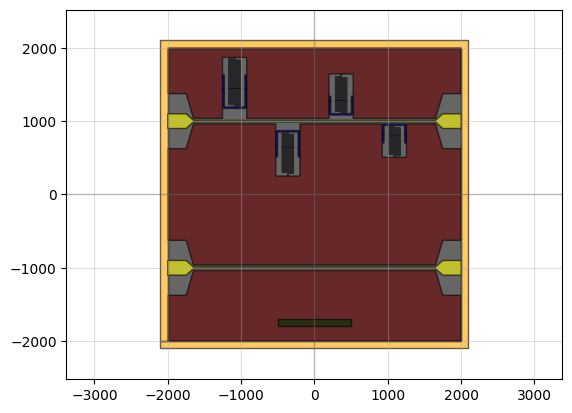

In [5]:
NumberOfResonators = int(4)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450,350, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[40,35, 31, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*np.linspace(136,0,4)
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
FeedlineWidth = 20
FeedlineLength  = 3300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
# FeedlineLength = 3300
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 4000]

c, metal, chip = ChipResonatorsTwoTlines(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False , cap_sim = False,
                        ypos_tlines = [1000, -1000], EdgeResDistanceFactor=0.33)



chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/202504-Res-Al/Res-Al-0p6-v3-chip.gds")
qp(chip)

Resonator 1
Resonator 2
Resonator 3
Resonator 4
Inductor total length is [6820. 5995. 5335. 4180.]
The frequencies are [4.0879121554227655, 4.9403771008491475, 6.187956089839854, 6.984202631226809]


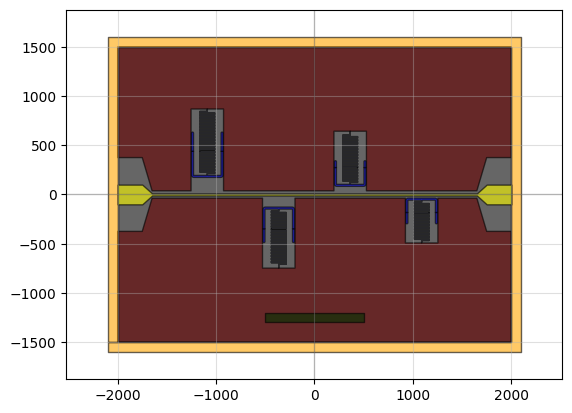

In [7]:
NumberOfResonators = int(4)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450,350, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[40,35, 31, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*np.linspace(136,0,4)
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
FeedlineWidth = 20
FeedlineLength  = 3300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
# FeedlineLength = 3300
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 3000]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False , cap_sim = False,
                     EdgeResDistanceFactor=0.33)



chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/202504-Res-Al/Res-Al-0p6-v3-chip-3x4.gds")
qp(chip)

Resonator 1
Resonator 2
Resonator 3
Resonator 4
Inductor total length is [6820. 5995. 5335. 4180.]
The frequencies are [4.084627725189891, 4.939109627607541, 6.190174677129543, 6.994278838672952]


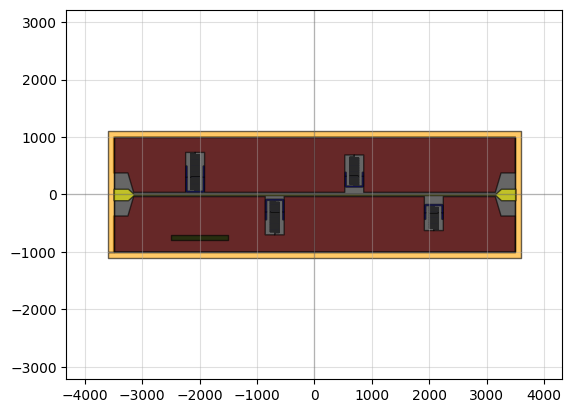

In [7]:
NumberOfResonators = int(4)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450,350, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[40,35, 31, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*np.sort(np.linspace(136,0,4))
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
FeedlineWidth = 20
FeedlineLength  = 6300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
# FeedlineLength = 3300
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 2000]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False , cap_sim = False,
                     EdgeResDistanceFactor=0.33)



chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/202504-Res-Al/Res-Al-0p6-v3-chip-2x7.gds")
qp(chip)

# SiRes-Al-0p3-v1

Resonator 1
Resonator 2
Resonator 3
Resonator 4
Inductor total length is [5335. 4180. 4510. 3520.]
The frequencies are [3.892137549834232, 4.66208530744381, 5.669772063440769, 6.413069762359158]


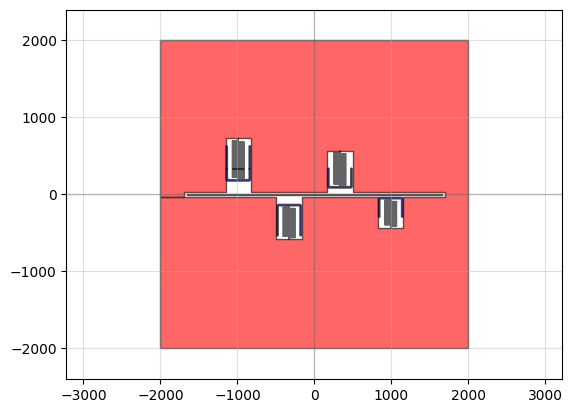

In [40]:
NumberOfResonators = int(4)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450, 400, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[32, 25,27,21]-np.ones(NumberOfResonators, dtype=int)
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.3] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*np.linspace(136,0,4)
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
FeedlineWidth = 20
FeedlineLength  = 3300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
# FeedlineLength = 3300
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 4000]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)


il = round(InductorTotalLength[0])
cvl = round(CapacitorVerticalLength[0])

chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/202504-Res-Al/Res-Al-0p3-v1_2.gds")
qp(chip)

Cap

Resonator 1
Resonator 2
Resonator 3
Resonator 4
Inductor total length is [5335. 4180. 4510. 3520.]
The frequencies are [3.892137549834232, 4.66208530744381, 5.669772063440769, 6.413069762359158]


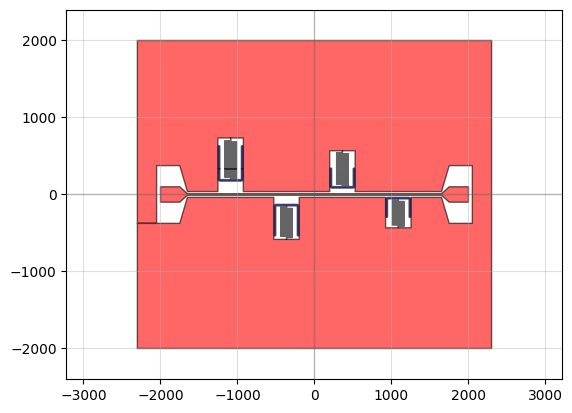

In [42]:
NumberOfResonators = int(4)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450, 400, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[32, 25,27,21]-np.ones(NumberOfResonators, dtype=int)
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.3] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*np.linspace(136,0,4)
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
FeedlineWidth = 20
FeedlineLength  = 3300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
# FeedlineLength = 3300
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 4000]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False, cap_sim =True, EdgeResDistanceFactor=0.33)


il = round(InductorTotalLength[0])
cvl = round(CapacitorVerticalLength[0])

chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/202504-Res-Al/Res-Al-0p3-v1_2-cap.gds")
qp(chip)